In [1]:
from datetime import datetime
import itertools
import joblib
import json

import pandas as pd
import numpy as np
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook


from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
data_points = 12

In [5]:
np.random.seed(7)

In [6]:
x = np.linspace(-5, 5, data_points)
x_train = x[range(1,data_points,2)]
x_test = x[range(0,data_points,2)]
x_plot = np.linspace(-5, 5, 10000)

In [7]:
y_train = x_train** 2 + 1.2 * np.random.randn(int(data_points/2))
y_test = x_test**2 + 1.2 * np.random.randn(int(data_points/2))

### Overfit

In [8]:
best_weights_filepath = './overfit.hdf5'

In [9]:
model = Sequential()
model.add(Dense(20, input_dim=1, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1))
opt = Adam(lr=.01)
model.compile(optimizer=opt, loss='mse')

In [10]:
model.fit(x_train.reshape(-1, 1), y_train, epochs=4000, batch_size=x_train.size,
          callbacks=[ModelCheckpoint(best_weights_filepath, monitor='loss', verbose=0,
                                     save_best_only=True, mode='auto')])

Epoch 1/4000
6/6 [==============================] - 0s - loss: 193.0875
Epoch 2/4000
6/6 [==============================] - 0s - loss: 189.8800
Epoch 3/4000
6/6 [==============================] - 0s - loss: 186.7660
Epoch 4/4000
6/6 [==============================] - 0s - loss: 183.7498
Epoch 5/4000
6/6 [==============================] - 0s - loss: 180.8376
Epoch 6/4000
6/6 [==============================] - 0s - loss: 178.0311
Epoch 7/4000
6/6 [==============================] - 0s - loss: 175.3307
Epoch 8/4000
6/6 [==============================] - 0s - loss: 172.7361
Epoch 9/4000
6/6 [==============================] - 0s - loss: 170.2476
Epoch 10/4000
6/6 [==============================] - 0s - loss: 167.8847
Epoch 11/4000
6/6 [==============================] - 0s - loss: 165.6035
Epoch 12/4000
6/6 [==============================] - 0s - loss: 163.4234
Epoch 13/4000
6/6 [==============================] - 0s - loss: 161.3410
Epoch 14/4000
6/6 [==============================] - 0s - lo

6/6 [==============================] - 0s - loss: 80.8931
Epoch 226/4000
6/6 [==============================] - 0s - loss: 80.8917
Epoch 227/4000
6/6 [==============================] - 0s - loss: 80.8905
Epoch 228/4000
6/6 [==============================] - 0s - loss: 80.8893
Epoch 229/4000
6/6 [==============================] - 0s - loss: 80.8881
Epoch 230/4000
6/6 [==============================] - 0s - loss: 80.8871
Epoch 231/4000
6/6 [==============================] - 0s - loss: 80.8861
Epoch 232/4000
6/6 [==============================] - 0s - loss: 80.8851
Epoch 233/4000
6/6 [==============================] - 0s - loss: 80.8842
Epoch 234/4000
6/6 [==============================] - 0s - loss: 80.8833
Epoch 235/4000
6/6 [==============================] - 0s - loss: 80.8825
Epoch 236/4000
6/6 [==============================] - 0s - loss: 80.8818
Epoch 237/4000
6/6 [==============================] - 0s - loss: 80.8810
Epoch 238/4000
6/6 [==============================] - 0s - loss: 8

6/6 [==============================] - 0s - loss: 80.7255
Epoch 450/4000
6/6 [==============================] - 0s - loss: 80.7185
Epoch 451/4000
6/6 [==============================] - 0s - loss: 80.7110
Epoch 452/4000
6/6 [==============================] - 0s - loss: 80.7027
Epoch 453/4000
6/6 [==============================] - 0s - loss: 80.6936
Epoch 454/4000
6/6 [==============================] - 0s - loss: 80.6835
Epoch 455/4000
6/6 [==============================] - 0s - loss: 80.6724
Epoch 456/4000
6/6 [==============================] - 0s - loss: 80.6601
Epoch 457/4000
6/6 [==============================] - 0s - loss: 80.6464
Epoch 458/4000
6/6 [==============================] - 0s - loss: 80.6310
Epoch 459/4000
6/6 [==============================] - 0s - loss: 80.6137
Epoch 460/4000
6/6 [==============================] - 0s - loss: 80.5942
Epoch 461/4000
6/6 [==============================] - 0s - loss: 80.5722
Epoch 462/4000
6/6 [==============================] - 0s - loss: 8

6/6 [==============================] - 0s - loss: 9.5068
Epoch 674/4000
6/6 [==============================] - 0s - loss: 9.3053
Epoch 675/4000
6/6 [==============================] - 0s - loss: 9.1089
Epoch 676/4000
6/6 [==============================] - 0s - loss: 8.9176
Epoch 677/4000
6/6 [==============================] - 0s - loss: 8.7314
Epoch 678/4000
6/6 [==============================] - 0s - loss: 8.5503
Epoch 679/4000
6/6 [==============================] - 0s - loss: 8.3740
Epoch 680/4000
6/6 [==============================] - 0s - loss: 8.2023
Epoch 681/4000
6/6 [==============================] - 0s - loss: 8.0351
Epoch 682/4000
6/6 [==============================] - 0s - loss: 7.8721
Epoch 683/4000
6/6 [==============================] - 0s - loss: 7.7130
Epoch 684/4000
6/6 [==============================] - 0s - loss: 7.5578
Epoch 685/4000
6/6 [==============================] - 0s - loss: 7.4063
Epoch 686/4000
6/6 [==============================] - 0s - loss: 7.2583
Epoch 6

6/6 [==============================] - 0s - loss: 1.3170
Epoch 788/4000
6/6 [==============================] - 0s - loss: 1.2987
Epoch 789/4000
6/6 [==============================] - 0s - loss: 1.2807
Epoch 790/4000
6/6 [==============================] - 0s - loss: 1.2631
Epoch 791/4000
6/6 [==============================] - 0s - loss: 1.2458
Epoch 792/4000
6/6 [==============================] - 0s - loss: 1.2287
Epoch 793/4000
6/6 [==============================] - 0s - loss: 1.2120
Epoch 794/4000
6/6 [==============================] - 0s - loss: 1.1956
Epoch 795/4000
6/6 [==============================] - 0s - loss: 1.1795
Epoch 796/4000
6/6 [==============================] - 0s - loss: 1.1637
Epoch 797/4000
6/6 [==============================] - 0s - loss: 1.1482
Epoch 798/4000
6/6 [==============================] - 0s - loss: 1.1329
Epoch 799/4000
6/6 [==============================] - 0s - loss: 1.1180
Epoch 800/4000
6/6 [==============================] - 0s - loss: 1.1033
Epoch 8

6/6 [==============================] - 0s - loss: 0.4179
Epoch 902/4000
6/6 [==============================] - 0s - loss: 0.4150
Epoch 903/4000
6/6 [==============================] - 0s - loss: 0.4122
Epoch 904/4000
6/6 [==============================] - 0s - loss: 0.4094
Epoch 905/4000
6/6 [==============================] - 0s - loss: 0.4066
Epoch 906/4000
6/6 [==============================] - 0s - loss: 0.4038
Epoch 907/4000
6/6 [==============================] - 0s - loss: 0.4010
Epoch 908/4000
6/6 [==============================] - 0s - loss: 0.3983
Epoch 909/4000
6/6 [==============================] - 0s - loss: 0.3956
Epoch 910/4000
6/6 [==============================] - 0s - loss: 0.3929
Epoch 911/4000
6/6 [==============================] - 0s - loss: 0.3903
Epoch 912/4000
6/6 [==============================] - 0s - loss: 0.3876
Epoch 913/4000
6/6 [==============================] - 0s - loss: 0.3850
Epoch 914/4000
6/6 [==============================] - 0s - loss: 0.3824
Epoch 9

6/6 [==============================] - 0s - loss: 0.0194
Epoch 1127/4000
6/6 [==============================] - 0s - loss: 0.0190
Epoch 1128/4000
6/6 [==============================] - 0s - loss: 0.0186
Epoch 1129/4000
6/6 [==============================] - 0s - loss: 0.0182
Epoch 1130/4000
6/6 [==============================] - 0s - loss: 0.0179
Epoch 1131/4000
6/6 [==============================] - 0s - loss: 0.0175
Epoch 1132/4000
6/6 [==============================] - 0s - loss: 0.0171
Epoch 1133/4000
6/6 [==============================] - 0s - loss: 0.0168
Epoch 1134/4000
6/6 [==============================] - 0s - loss: 0.0164
Epoch 1135/4000
6/6 [==============================] - 0s - loss: 0.0161
Epoch 1136/4000
6/6 [==============================] - 0s - loss: 0.0158
Epoch 1137/4000
6/6 [==============================] - 0s - loss: 0.0154
Epoch 1138/4000
6/6 [==============================] - 0s - loss: 0.0151
Epoch 1139/4000
6/6 [==============================] - 0s - loss: 0

6/6 [==============================] - 0s - loss: 1.1405e-04
Epoch 1346/4000
6/6 [==============================] - 0s - loss: 1.1121e-04
Epoch 1347/4000
6/6 [==============================] - 0s - loss: 1.0845e-04
Epoch 1348/4000
6/6 [==============================] - 0s - loss: 1.0575e-04
Epoch 1349/4000
6/6 [==============================] - 0s - loss: 1.0311e-04
Epoch 1350/4000
6/6 [==============================] - 0s - loss: 1.0054e-04
Epoch 1351/4000
6/6 [==============================] - 0s - loss: 9.8040e-05
Epoch 1352/4000
6/6 [==============================] - 0s - loss: 9.5606e-05
Epoch 1353/4000
6/6 [==============================] - 0s - loss: 9.3218e-05
Epoch 1354/4000
6/6 [==============================] - 0s - loss: 9.0901e-05
Epoch 1355/4000
6/6 [==============================] - 0s - loss: 8.8625e-05
Epoch 1356/4000
6/6 [==============================] - 0s - loss: 8.6413e-05
Epoch 1357/4000
6/6 [==============================] - 0s - loss: 8.4248e-05
Epoch 1358/4000

6/6 [==============================] - 0s - loss: 4.4519e-07
Epoch 1558/4000
6/6 [==============================] - 0s - loss: 4.3282e-07
Epoch 1559/4000
6/6 [==============================] - 0s - loss: 4.2080e-07
Epoch 1560/4000
6/6 [==============================] - 0s - loss: 4.0902e-07
Epoch 1561/4000
6/6 [==============================] - 0s - loss: 3.9742e-07
Epoch 1562/4000
6/6 [==============================] - 0s - loss: 3.8768e-07
Epoch 1563/4000
6/6 [==============================] - 0s - loss: 3.7632e-07
Epoch 1564/4000
6/6 [==============================] - 0s - loss: 3.6619e-07
Epoch 1565/4000
6/6 [==============================] - 0s - loss: 3.5615e-07
Epoch 1566/4000
6/6 [==============================] - 0s - loss: 3.4636e-07
Epoch 1567/4000
6/6 [==============================] - 0s - loss: 3.3741e-07
Epoch 1568/4000
6/6 [==============================] - 0s - loss: 3.2865e-07
Epoch 1569/4000
6/6 [==============================] - 0s - loss: 3.1939e-07
Epoch 1570/4000

6/6 [==============================] - 0s - loss: 7.4522e-10
Epoch 1770/4000
6/6 [==============================] - 0s - loss: 7.4455e-10
Epoch 1771/4000
6/6 [==============================] - 0s - loss: 7.4364e-10
Epoch 1772/4000
6/6 [==============================] - 0s - loss: 6.9658e-10
Epoch 1773/4000
6/6 [==============================] - 0s - loss: 6.5476e-10
Epoch 1774/4000
6/6 [==============================] - 0s - loss: 6.5558e-10
Epoch 1775/4000
6/6 [==============================] - 0s - loss: 6.4914e-10
Epoch 1776/4000
6/6 [==============================] - 0s - loss: 6.0911e-10
Epoch 1777/4000
6/6 [==============================] - 0s - loss: 6.1340e-10
Epoch 1778/4000
6/6 [==============================] - 0s - loss: 6.4196e-10
Epoch 1779/4000
6/6 [==============================] - 0s - loss: 6.0209e-10
Epoch 1780/4000
6/6 [==============================] - 0s - loss: 6.0207e-10
Epoch 1781/4000
6/6 [==============================] - 0s - loss: 5.9955e-10
Epoch 1782/4000

6/6 [==============================] - 0s - loss: 3.2803e-10
Epoch 1982/4000
6/6 [==============================] - 0s - loss: 3.2942e-10
Epoch 1983/4000
6/6 [==============================] - 0s - loss: 3.3109e-10
Epoch 1984/4000
6/6 [==============================] - 0s - loss: 3.3098e-10
Epoch 1985/4000
6/6 [==============================] - 0s - loss: 3.2611e-10
Epoch 1986/4000
6/6 [==============================] - 0s - loss: 3.2540e-10
Epoch 1987/4000
6/6 [==============================] - 0s - loss: 3.3067e-10
Epoch 1988/4000
6/6 [==============================] - 0s - loss: 3.2586e-10
Epoch 1989/4000
6/6 [==============================] - 0s - loss: 3.2768e-10
Epoch 1990/4000
6/6 [==============================] - 0s - loss: 3.2532e-10
Epoch 1991/4000
6/6 [==============================] - 0s - loss: 3.2555e-10
Epoch 1992/4000
6/6 [==============================] - 0s - loss: 3.2919e-10
Epoch 1993/4000
6/6 [==============================] - 0s - loss: 3.2555e-10
Epoch 1994/4000

6/6 [==============================] - 0s - loss: 2.0627e-10
Epoch 2194/4000
6/6 [==============================] - 0s - loss: 2.0032e-10
Epoch 2195/4000
6/6 [==============================] - 0s - loss: 2.2614e-10
Epoch 2196/4000
6/6 [==============================] - 0s - loss: 2.0151e-10
Epoch 2197/4000
6/6 [==============================] - 0s - loss: 2.0560e-10
Epoch 2198/4000
6/6 [==============================] - 0s - loss: 2.1829e-10
Epoch 2199/4000
6/6 [==============================] - 0s - loss: 2.0242e-10
Epoch 2200/4000
6/6 [==============================] - 0s - loss: 2.1530e-10
Epoch 2201/4000
6/6 [==============================] - 0s - loss: 2.1294e-10
Epoch 2202/4000
6/6 [==============================] - 0s - loss: 2.1230e-10
Epoch 2203/4000
6/6 [==============================] - 0s - loss: 2.1628e-10
Epoch 2204/4000
6/6 [==============================] - 0s - loss: 2.0166e-10
Epoch 2205/4000
6/6 [==============================] - 0s - loss: 2.2189e-10
Epoch 2206/4000

6/6 [==============================] - 0s - loss: 1.2215e-10
Epoch 2406/4000
6/6 [==============================] - 0s - loss: 1.2176e-10
Epoch 2407/4000
6/6 [==============================] - 0s - loss: 1.2116e-10
Epoch 2408/4000
6/6 [==============================] - 0s - loss: 1.2268e-10
Epoch 2409/4000
6/6 [==============================] - 0s - loss: 1.2195e-10
Epoch 2410/4000
6/6 [==============================] - 0s - loss: 1.2139e-10
Epoch 2411/4000
6/6 [==============================] - 0s - loss: 1.2200e-10
Epoch 2412/4000
6/6 [==============================] - 0s - loss: 1.2206e-10
Epoch 2413/4000
6/6 [==============================] - 0s - loss: 1.2191e-10
Epoch 2414/4000
6/6 [==============================] - 0s - loss: 1.2161e-10
Epoch 2415/4000
6/6 [==============================] - 0s - loss: 1.2165e-10
Epoch 2416/4000
6/6 [==============================] - 0s - loss: 1.2182e-10
Epoch 2417/4000
6/6 [==============================] - 0s - loss: 1.2475e-10
Epoch 2418/4000

6/6 [==============================] - 0s - loss: 7.8425e-11
Epoch 2618/4000
6/6 [==============================] - 0s - loss: 9.0383e-11
Epoch 2619/4000
6/6 [==============================] - 0s - loss: 1.0994e-10
Epoch 2620/4000
6/6 [==============================] - 0s - loss: 8.2312e-11
Epoch 2621/4000
6/6 [==============================] - 0s - loss: 7.9856e-11
Epoch 2622/4000
6/6 [==============================] - 0s - loss: 1.0291e-10
Epoch 2623/4000
6/6 [==============================] - 0s - loss: 9.7070e-11
Epoch 2624/4000
6/6 [==============================] - 0s - loss: 7.6710e-11
Epoch 2625/4000
6/6 [==============================] - 0s - loss: 9.3538e-11
Epoch 2626/4000
6/6 [==============================] - 0s - loss: 1.0104e-10
Epoch 2627/4000
6/6 [==============================] - 0s - loss: 8.1412e-11
Epoch 2628/4000
6/6 [==============================] - 0s - loss: 7.6552e-11
Epoch 2629/4000
6/6 [==============================] - 0s - loss: 7.5121e-11
Epoch 2630/4000

6/6 [==============================] - 0s - loss: 3.5122e-11
Epoch 2830/4000
6/6 [==============================] - 0s - loss: 3.2242e-11
Epoch 2831/4000
6/6 [==============================] - 0s - loss: 3.6704e-11
Epoch 2832/4000
6/6 [==============================] - 0s - loss: 3.8609e-11
Epoch 2833/4000
6/6 [==============================] - 0s - loss: 3.1484e-11
Epoch 2834/4000
6/6 [==============================] - 0s - loss: 5.3767e-11
Epoch 2835/4000
6/6 [==============================] - 0s - loss: 9.7553e-11
Epoch 2836/4000
6/6 [==============================] - 0s - loss: 9.4749e-11
Epoch 2837/4000
6/6 [==============================] - 0s - loss: 5.6322e-11
Epoch 2838/4000
6/6 [==============================] - 0s - loss: 3.0695e-11
Epoch 2839/4000
6/6 [==============================] - 0s - loss: 4.5967e-11
Epoch 2840/4000
6/6 [==============================] - 0s - loss: 8.5417e-11
Epoch 2841/4000
6/6 [==============================] - 0s - loss: 1.0679e-10
Epoch 2842/4000

6/6 [==============================] - 0s - loss: 6.3210e-06
Epoch 3042/4000
6/6 [==============================] - 0s - loss: 1.0656e-09
Epoch 3043/4000
6/6 [==============================] - 0s - loss: 5.1993e-06
Epoch 3044/4000
6/6 [==============================] - 0s - loss: 8.4414e-06
Epoch 3045/4000
6/6 [==============================] - 0s - loss: 2.8623e-06
Epoch 3046/4000
6/6 [==============================] - 0s - loss: 2.0001e-07
Epoch 3047/4000
6/6 [==============================] - 0s - loss: 4.4126e-06
Epoch 3048/4000
6/6 [==============================] - 0s - loss: 5.3433e-06
Epoch 3049/4000
6/6 [==============================] - 0s - loss: 1.1685e-06
Epoch 3050/4000
6/6 [==============================] - 0s - loss: 4.7034e-07
Epoch 3051/4000
6/6 [==============================] - 0s - loss: 3.4558e-06
Epoch 3052/4000
6/6 [==============================] - 0s - loss: 3.1738e-06
Epoch 3053/4000
6/6 [==============================] - 0s - loss: 4.0848e-07
Epoch 3054/4000

6/6 [==============================] - 0s - loss: 1.2506e-11
Epoch 3254/4000
6/6 [==============================] - 0s - loss: 1.2477e-11
Epoch 3255/4000
6/6 [==============================] - 0s - loss: 1.9867e-11
Epoch 3256/4000
6/6 [==============================] - 0s - loss: 2.5248e-11
Epoch 3257/4000
6/6 [==============================] - 0s - loss: 1.7773e-11
Epoch 3258/4000
6/6 [==============================] - 0s - loss: 1.0632e-11
Epoch 3259/4000
6/6 [==============================] - 0s - loss: 1.3112e-11
Epoch 3260/4000
6/6 [==============================] - 0s - loss: 1.2771e-11
Epoch 3261/4000
6/6 [==============================] - 0s - loss: 1.1428e-11
Epoch 3262/4000
6/6 [==============================] - 0s - loss: 1.0177e-11
Epoch 3263/4000
6/6 [==============================] - 0s - loss: 1.3057e-11
Epoch 3264/4000
6/6 [==============================] - 0s - loss: 2.0388e-11
Epoch 3265/4000
6/6 [==============================] - 0s - loss: 2.0788e-11
Epoch 3266/4000

6/6 [==============================] - 0s - loss: 8.0456e-06
Epoch 3466/4000
6/6 [==============================] - 0s - loss: 7.5846e-06
Epoch 3467/4000
6/6 [==============================] - 0s - loss: 4.4003e-06
Epoch 3468/4000
6/6 [==============================] - 0s - loss: 1.1723e-06
Epoch 3469/4000
6/6 [==============================] - 0s - loss: 3.0895e-09
Epoch 3470/4000
6/6 [==============================] - 0s - loss: 1.1373e-06
Epoch 3471/4000
6/6 [==============================] - 0s - loss: 3.1191e-06
Epoch 3472/4000
6/6 [==============================] - 0s - loss: 4.1600e-06
Epoch 3473/4000
6/6 [==============================] - 0s - loss: 3.5763e-06
Epoch 3474/4000
6/6 [==============================] - 0s - loss: 1.9089e-06
Epoch 3475/4000
6/6 [==============================] - 0s - loss: 4.3217e-07
Epoch 3476/4000
6/6 [==============================] - 0s - loss: 1.5498e-08
Epoch 3477/4000
6/6 [==============================] - 0s - loss: 6.5113e-07
Epoch 3478/4000

6/6 [==============================] - 0s - loss: 1.1181e-06
Epoch 3678/4000
6/6 [==============================] - 0s - loss: 1.1047e-06
Epoch 3679/4000
6/6 [==============================] - 0s - loss: 7.4414e-07
Epoch 3680/4000
6/6 [==============================] - 0s - loss: 2.9398e-07
Epoch 3681/4000
6/6 [==============================] - 0s - loss: 2.6236e-08
Epoch 3682/4000
6/6 [==============================] - 0s - loss: 4.2777e-08
Epoch 3683/4000
6/6 [==============================] - 0s - loss: 2.5278e-07
Epoch 3684/4000
6/6 [==============================] - 0s - loss: 4.7030e-07
Epoch 3685/4000
6/6 [==============================] - 0s - loss: 5.4279e-07
Epoch 3686/4000
6/6 [==============================] - 0s - loss: 4.3894e-07
Epoch 3687/4000
6/6 [==============================] - 0s - loss: 2.3762e-07
Epoch 3688/4000
6/6 [==============================] - 0s - loss: 6.3840e-08
Epoch 3689/4000
6/6 [==============================] - 0s - loss: 1.4647e-11
Epoch 3690/4000

6/6 [==============================] - 0s - loss: 2.4046e-06
Epoch 3890/4000
6/6 [==============================] - 0s - loss: 4.8030e-07
Epoch 3891/4000
6/6 [==============================] - 0s - loss: 1.1097e-07
Epoch 3892/4000
6/6 [==============================] - 0s - loss: 1.2929e-06
Epoch 3893/4000
6/6 [==============================] - 0s - loss: 2.1163e-06
Epoch 3894/4000
6/6 [==============================] - 0s - loss: 1.4787e-06
Epoch 3895/4000
6/6 [==============================] - 0s - loss: 3.2383e-07
Epoch 3896/4000
6/6 [==============================] - 0s - loss: 4.7004e-08
Epoch 3897/4000
6/6 [==============================] - 0s - loss: 7.1681e-07
Epoch 3898/4000
6/6 [==============================] - 0s - loss: 1.2489e-06
Epoch 3899/4000
6/6 [==============================] - 0s - loss: 9.4010e-07
Epoch 3900/4000
6/6 [==============================] - 0s - loss: 2.5113e-07
Epoch 3901/4000
6/6 [==============================] - 0s - loss: 9.0151e-09
Epoch 3902/4000

In [11]:
model.load_weights(best_weights_filepath)

In [12]:
y_plot_over = model.predict(x_plot.reshape(-1, 1))

<IPython.core.display.Javascript object>


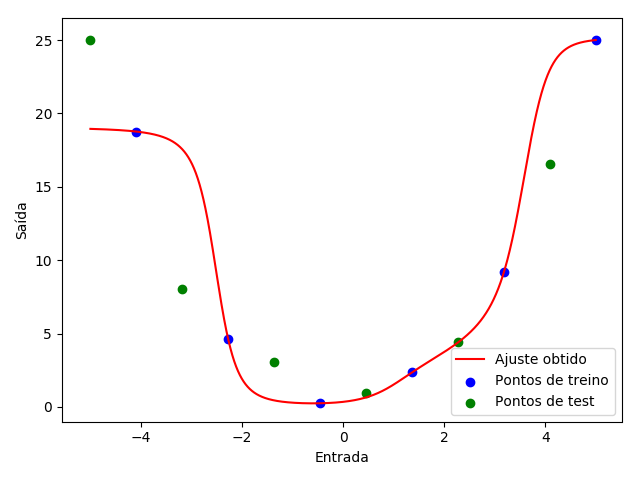

In [13]:
plt.figure()
plt.scatter(x_train, y_train, color='b', label="Pontos de treino")
plt.scatter(x_test, y_test, color='g', label="Pontos de test")
plt.plot(x_plot, y_plot_over, color='r', label="Ajuste obtido")
plt.xlabel("Entrada")
plt.ylabel("Saída")
plt.legend()
plt.tight_layout()
plt.show()

### Best fit

In [14]:
y_plot_best = x_plot**2

<IPython.core.display.Javascript object>


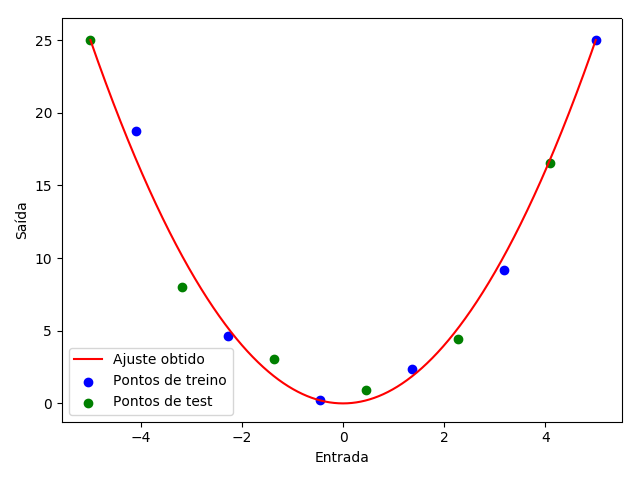

In [15]:
plt.figure()
plt.scatter(x_train, y_train, color='b', label="Pontos de treino")
plt.scatter(x_test, y_test, color='g', label="Pontos de test")
plt.plot(x_plot, y_plot_best, color='r', label="Ajuste obtido")
plt.xlabel("Entrada")
plt.ylabel("Saída")
plt.legend()
plt.tight_layout()
plt.show()

### Underfit

In [16]:
clf = LinearRegression()

In [17]:
clf.fit(x_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_plot_under = clf.predict(x_plot.reshape(-1, 1))

<IPython.core.display.Javascript object>


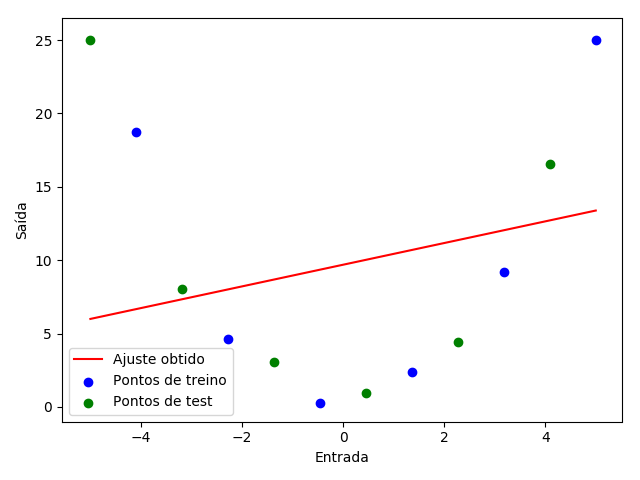

In [19]:
plt.figure()
plt.scatter(x_train, y_train, color='b', label="Pontos de treino")
plt.scatter(x_test, y_test, color='g', label="Pontos de test")
plt.plot(x_plot, y_plot_under, color='r', label="Ajuste obtido")
plt.xlabel("Entrada")
plt.ylabel("Saída")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

<IPython.core.display.Javascript object>


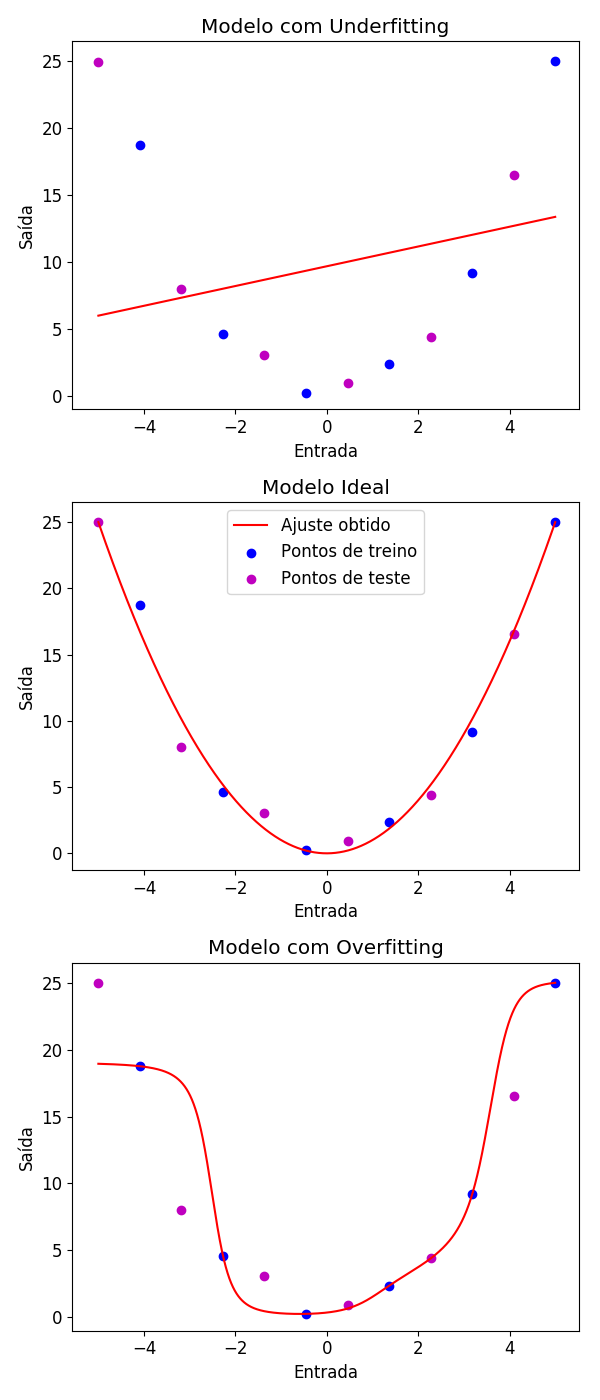

In [27]:
fig = plt.figure(figsize=(6,14))
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title("Modelo com Underfitting")
ax1.scatter(x_train, y_train, color='b', label="Pontos de treino")
ax1.scatter(x_test, y_test, color='m', label="Pontos de teste")
ax1.plot(x_plot, y_plot_under, color='r', label="Ajuste obtido")
ax1.set_xlabel("Entrada")
ax1.set_ylabel("Saída")
ax2 = fig.add_subplot(3, 1, 2)
ax2.set_title("Modelo Ideal")
ax2.scatter(x_train, y_train, color='b', label="Pontos de treino")
ax2.scatter(x_test, y_test, color='m', label="Pontos de teste")
ax2.plot(x_plot, y_plot_best, color='r', label="Ajuste obtido")
ax2.set_xlabel("Entrada")
ax2.set_ylabel("Saída")
ax3 = fig.add_subplot(3, 1, 3)
ax3.set_title("Modelo com Overfitting")
ax3.scatter(x_train, y_train, color='b', label="Pontos de treino")
ax3.scatter(x_test, y_test, color='m', label="Pontos de teste")
ax3.plot(x_plot, y_plot_over, color='r', label="Ajuste obtido")
ax3.set_xlabel("Entrada")
ax3.set_ylabel("Saída")
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper center')
fig.tight_layout()
fig.show()